In [3]:
import torch 
from torch import nn
import pandas as pd
import dask.dataframe as dd
import csv
import numpy as np
import matplotlib.pyplot as plt
import torch 
from sklearn.model_selection import train_test_split

device = "cuda" if torch.cuda.is_available() else "cpu"

print("Loading CSV...")
dataset = pd.read_csv("spam.csv", encoding='latin-1')
dataset.tail(n=10)


Loading CSV...


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
31271,ham,on NUMBER aug NUMBER at NUMBER NUMBER rohit kh...,NaN,NaN,NaN
31272,ham,if it s not stateful it wouldn t seem to be wo...,NaN,NaN,NaN
31273,ham,on NUMBER aug NUMBER at NUMBER NUMBER rohit kh...,NaN,NaN,NaN
31274,ham,hardware acceleration for ssl makes sense sinc...,NaN,NaN,NaN
31275,ham,on tue NUMBER aug NUMBER rohit khare wrote dat...,NaN,NaN,NaN
31276,ham,politicians worldwide are discovering the inte...,NaN,NaN,NaN
31277,ham,i m not sure what you mean by let s you and h...,NaN,NaN,NaN
31278,ham,this is my netscape NUMBER NUMBER review o the...,NaN,NaN,NaN
31279,ham,on wed NUMBER NUMBER NUMBER at NUMBER NUMBER f...,NaN,NaN,NaN
31280,ham,i got to see powell talk in march NUMBER at th...,NaN,NaN,NaN


In [4]:
del dataset["Unnamed: 2"]
del dataset["Unnamed: 3"]
del dataset["Unnamed: 4"]
dataset = dataset.rename(columns={"v1":"label", "v2":"email"})
dataset

,label,email
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,spam,FreeMsg Hey there darling it's been 3 week's n...
2,spam,WINNER!! As a valued network customer you have...
3,spam,Had your mobile 11 months or more? U R entitle...
4,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
31276,ham,politicians worldwide are discovering the inte...
31277,ham,i m not sure what you mean by let s you and h...
31278,ham,this is my netscape NUMBER NUMBER review o the...
31279,ham,on wed NUMBER NUMBER NUMBER at NUMBER NUMBER f...


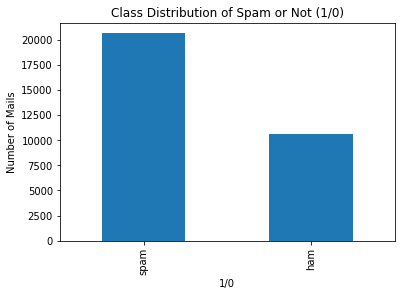

In [5]:
class_counts = dataset['label'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Spam or Not (1/0)')
plt.xlabel('1/0')
plt.ylabel('Number of Mails')
plt.show()

In [6]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(dataset['email'], 
                                                    dataset['label'],test_size=0.20, 
                                                    random_state=1)

In [7]:
dataset['email'].isnull().sum()

0

In [8]:
dataset['email'].fillna(method="pad")
dataset['email'].isnull().sum()


0

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

training_data1 = count_vector.fit_transform(X_train1)
testing_data1 = count_vector.transform(X_test1)

In [10]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data1,y_train1)

MultinomialNB()

In [12]:
predictions = naive_bayes.predict(testing_data1)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test1, predictions)))

Accuracy score: 0.9699536519098609


In [ ]:
import pickle

with open('vectorizer.pkl', 'wb') as f:
  pickle.dump(count_vector ,f)

# save
with open('model.pkl','wb') as f:
    pickle.dump(naive_bayes,f)

# load
with open('model.pkl', 'rb') as f:
    naive_bayes2 = pickle.load(f)

test = ["Get rich now: Click Here"]
test1 = count_vector.transform(test)
naive_bayes2.predict(test1)

array(['spam'], dtype='<U4')